# Exploratory Data Analysis

The purpose of this notebook is to visually analyse prepared data and draw conclusions.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# let matplotlib plots be part of Jupyter Notebook
%matplotlib inline

# set up higher resolution for matplotlib plots
%config InlineBackend.figure_format = 'retina'

## Connect to Azure Machine Learning Service workspace

In [2]:
import azureml.core
from azureml.core import Workspace

ws = Workspace.from_config(path="../src_aml")

## Download latest dataset 

In [3]:
from azureml.core import Experiment

experiment = Experiment(ws, "Data_Preparation_Pipeline")

latest_completed_run = None
for run in experiment.get_runs():
    if run.get_status() == "Finished":
        latest_completed_run = run
        break

In [4]:
data_filename = "cleaning_output_pipeline_data"
download_location_base = os.path.join("..", "data", "interim", "after_cleaning")

In [5]:
# Retrieve the last step
last_step = latest_completed_run.find_step_run(name="Data cleaning")
if last_step:
    last_step_obj = last_step[0] # since we have only one step with the name
    # download output from the last step
    last_step_obj.get_output_data(data_filename).download(download_location_base, overwrite=True)

## Load data

In [6]:
# set path to downloaded data
filepath = os.path.join(download_location_base, "azureml", last_step[0].id, data_filename)
filepath

'../data/interim/after_cleaning/azureml/e78be5a4-bb0f-41d4-acb3-9c709e0cf43b/cleaning_output_pipeline_data'

In [7]:
# load data
df = pd.read_csv(filepath, parse_dates=['Timestamp'])
df = df.set_index('Timestamp')

## Quick verification of datasets

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14134 entries, 2019-10-25 15:20:00 to 2020-02-03 06:00:00
Columns: 204 entries, 15001 to 15254
dtypes: float64(204)
memory usage: 22.1 MB


In [9]:
# statistical characteristics of the dataset
df.describe()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
count,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,...,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000
mean,3.980190,3.248974,7.586246,7.752016,1.795599,2.390477,3.709566,2.964200,4.240838,5.216570,...,2.689967,1.998302,3.218480,3.281520,1.745154,1.726121,2.722230,3.250035,2.962290,1.365997
std,4.455242,4.056462,9.862762,11.429769,1.695334,2.867359,3.556588,3.351059,3.677918,4.596752,...,3.582364,2.045958,3.828926,2.873926,1.970921,1.813743,2.935924,2.455352,3.041761,2.187453
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000
50%,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,3.000000,2.000000,3.000000,4.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000
75%,6.000000,5.000000,11.000000,9.000000,2.000000,3.000000,6.000000,4.000000,6.000000,7.000000,...,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,4.000000,4.000000,2.000000
max,34.000000,32.000000,38.000000,70.000000,11.000000,15.000000,29.000000,20.000000,20.000000,23.000000,...,29.000000,15.000000,24.000000,16.000000,10.000000,11.000000,13.000000,16.000000,17.000000,9.000000


In [10]:
df.head()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-10-25 15:20:00,3.0,11.0,3.0,37.0,1.0,5.0,1.0,9.0,6.0,2.0,...,1.0,1.0,2.0,2.0,5.0,2.0,5.0,4.0,3.0,0.0
2019-10-25 15:30:00,4.0,3.0,3.0,37.0,1.0,3.0,2.0,9.0,4.0,2.0,...,2.0,0.0,1.0,3.0,5.0,1.0,6.0,5.0,2.0,0.0
2019-10-25 15:40:00,5.0,3.0,1.0,36.0,1.0,2.0,2.0,7.0,3.0,2.0,...,2.0,0.0,3.0,3.0,4.0,1.0,5.0,5.0,2.0,0.0
2019-10-25 15:50:00,4.0,5.0,1.0,39.0,1.0,1.0,2.0,7.0,3.0,2.0,...,4.0,0.0,3.0,4.0,3.0,1.0,2.0,5.0,2.0,0.0
2019-10-25 16:00:00,4.0,8.0,5.0,40.0,2.0,1.0,2.0,7.0,2.0,1.0,...,4.0,0.0,2.0,3.0,3.0,1.0,3.0,6.0,2.0,0.0


In [11]:
df.tail()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-03 05:20:00,1.0,5.0,4.0,3.0,3.0,2.0,2.0,0.0,3.0,1.0,...,0.0,7.0,3.0,4.0,0.0,1.0,0.0,2.0,0.0,4.0
2020-02-03 05:30:00,1.0,5.0,4.0,3.0,3.0,2.0,2.0,0.0,3.0,1.0,...,0.0,7.0,3.0,4.0,0.0,1.0,0.0,2.0,0.0,4.0
2020-02-03 05:40:00,1.0,5.0,4.0,3.0,3.0,2.0,2.0,0.0,3.0,1.0,...,0.0,7.0,3.0,4.0,0.0,1.0,0.0,2.0,0.0,4.0
2020-02-03 05:50:00,1.0,5.0,4.0,3.0,3.0,2.0,2.0,0.0,3.0,1.0,...,0.0,7.0,3.0,4.0,0.0,1.0,0.0,2.0,0.0,4.0
2020-02-03 06:00:00,1.0,5.0,4.0,3.0,3.0,2.0,2.0,0.0,3.0,1.0,...,0.0,7.0,3.0,4.0,0.0,1.0,0.0,2.0,0.0,4.0


In [12]:
# make sure dataframe has no missing data
assert df.isnull().sum().sum() == 0, "The dataframe contains some null values"

## Feature engineering

In [13]:
df['Summer Season'] = df.index.to_series().apply(lambda x: x.month not in [12,1,2])

## Visual inspection

In [14]:
def detect_periods_with_missing_data(df):
    # Set time period/window and calculate number of all available bikes
    resampled_df = df.resample('6H').sum().sum(axis=1)
    # Calculate slope/steepness of the graph of a function
    # (sum of all available bikes for each time window)
    slope = pd.Series(np.gradient(resampled_df.values), 
                      resampled_df.index, 
                      name='slope')
    # Determine time windows on which the number of available 
    # bikes did not change (so the slope is 0).
    return slope[ slope == 0 ].index

In [15]:
detect_periods_with_missing_data(df)

DatetimeIndex(['2019-11-13 18:00:00', '2019-11-14 00:00:00',
               '2019-11-14 06:00:00', '2019-11-16 00:00:00',
               '2019-11-16 06:00:00', '2019-11-16 12:00:00',
               '2019-11-16 18:00:00', '2019-11-17 00:00:00',
               '2019-11-17 06:00:00', '2019-11-18 12:00:00',
               '2019-11-19 00:00:00', '2019-11-19 12:00:00',
               '2019-11-19 18:00:00', '2019-11-20 00:00:00',
               '2019-11-20 06:00:00', '2019-11-20 12:00:00',
               '2019-11-20 18:00:00', '2019-11-21 06:00:00',
               '2019-11-21 12:00:00', '2019-11-21 18:00:00',
               '2019-11-22 06:00:00', '2019-11-22 12:00:00',
               '2019-11-22 18:00:00', '2019-12-18 18:00:00',
               '2019-12-19 00:00:00', '2019-12-19 06:00:00',
               '2019-12-19 12:00:00', '2019-12-19 18:00:00',
               '2019-12-20 00:00:00', '2019-12-20 06:00:00',
               '2019-12-20 12:00:00', '2019-12-20 18:00:00',
               '2019-12-

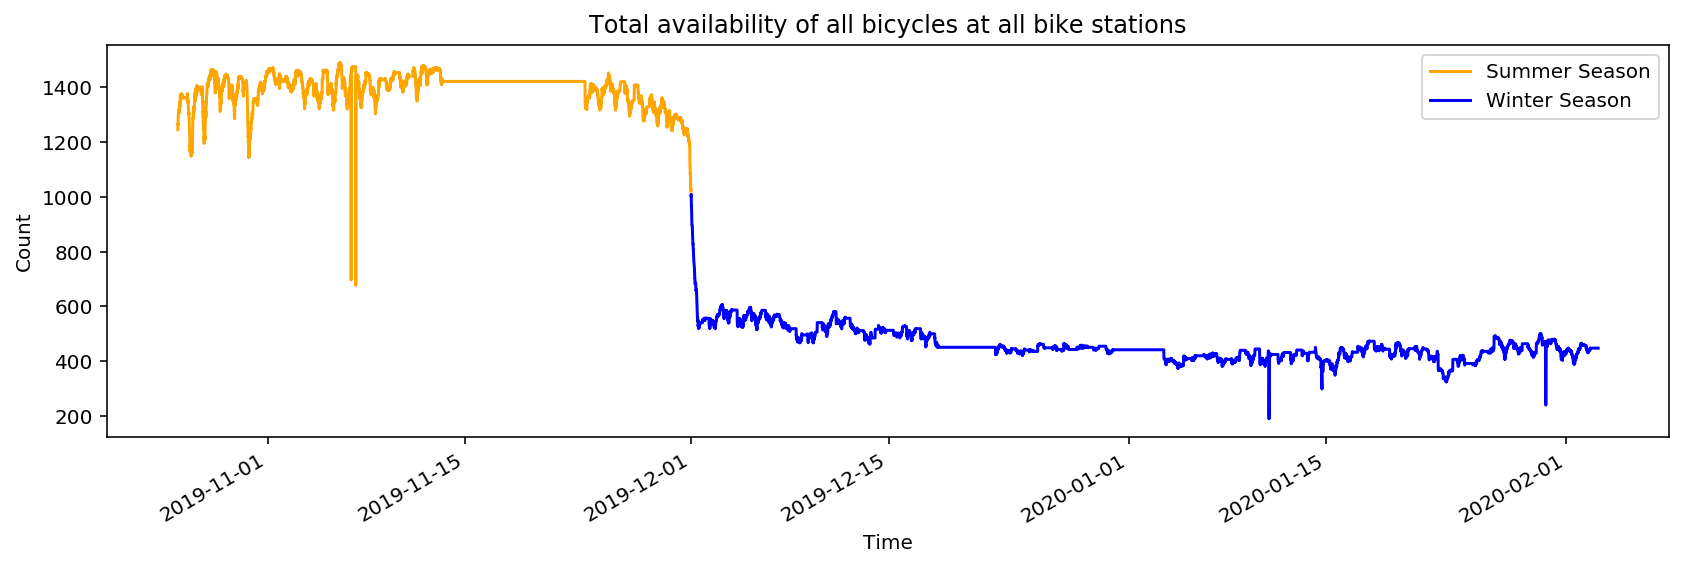

In [16]:
plt.figure(figsize=(14,4))
ax = df[ df['Summer Season'] == True ].sum(axis=1).plot(color='orange')
ax = df[ df['Summer Season'] == False ].sum(axis=1).plot(color='b')
ax.set_title('Total availability of all bicycles at all bike stations')
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.legend(['Summer Season', 'Winter Season']);

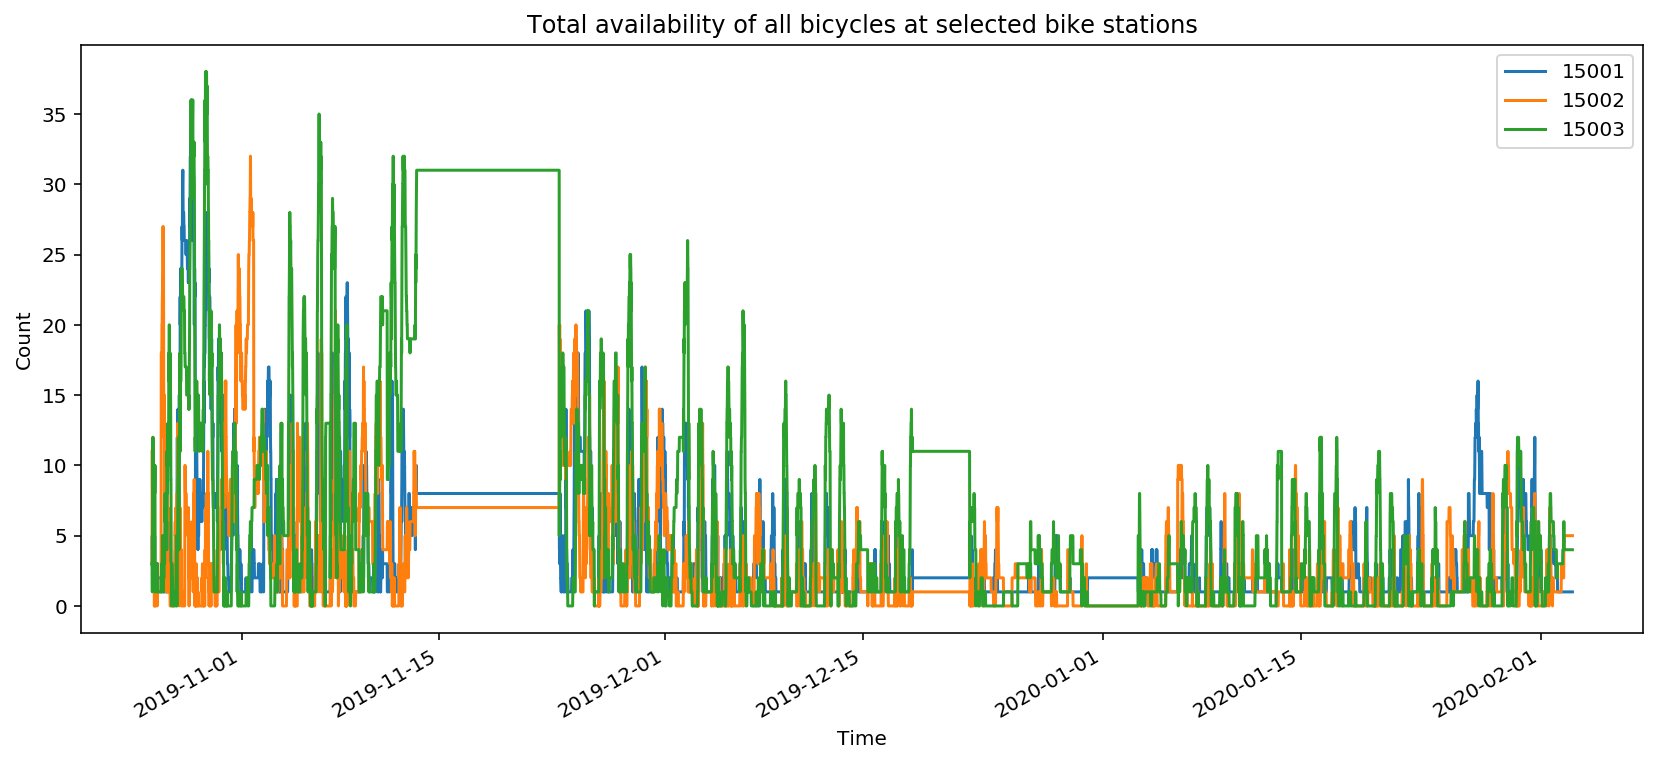

In [17]:
ax = df[['15001', '15002', '15003']].plot(figsize=(14,6))
ax.set_title('Total availability of all bicycles at selected bike stations')
ax.set_xlabel('Time')
ax.set_ylabel('Count');

In [18]:
mask = (df.index >= '2019-11-15') & (df.index <= '2019-11-22')
df.loc[mask]

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15196,15197,15198,15199,15200,15251,15252,15253,15254,Summer Season
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-11-15 12:10:00,8.0,7.0,31.0,6.0,2.0,2.0,8.0,1.0,11.0,7.0,...,4.0,10.0,6.0,1.0,0.0,5.0,2.0,4.0,0.0,True
2019-11-15 12:20:00,8.0,7.0,31.0,6.0,2.0,2.0,8.0,1.0,11.0,7.0,...,4.0,10.0,6.0,1.0,0.0,5.0,2.0,4.0,0.0,True
2019-11-15 12:30:00,8.0,7.0,31.0,6.0,2.0,2.0,8.0,1.0,11.0,7.0,...,4.0,10.0,6.0,1.0,0.0,5.0,2.0,4.0,0.0,True
2019-11-15 12:40:00,8.0,7.0,31.0,6.0,2.0,2.0,8.0,1.0,11.0,7.0,...,4.0,10.0,6.0,1.0,0.0,5.0,2.0,4.0,0.0,True
2019-11-15 12:50:00,8.0,7.0,31.0,6.0,2.0,2.0,8.0,1.0,11.0,7.0,...,4.0,10.0,6.0,1.0,0.0,5.0,2.0,4.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-21 23:20:00,8.0,7.0,31.0,6.0,2.0,2.0,8.0,1.0,11.0,7.0,...,4.0,10.0,6.0,1.0,0.0,5.0,2.0,4.0,0.0,True
2019-11-21 23:30:00,8.0,7.0,31.0,6.0,2.0,2.0,8.0,1.0,11.0,7.0,...,4.0,10.0,6.0,1.0,0.0,5.0,2.0,4.0,0.0,True
2019-11-21 23:40:00,8.0,7.0,31.0,6.0,2.0,2.0,8.0,1.0,11.0,7.0,...,4.0,10.0,6.0,1.0,0.0,5.0,2.0,4.0,0.0,True


In [19]:
df.loc[mask].sum(axis=1).values

array([1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421.,
       1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421.,
       1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421.,
       1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421.,
       1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421.,
       1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421.,
       1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421.,
       1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421.,
       1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421.,
       1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421.,
       1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421.,
       1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421.,
       1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421.,
       1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421., 1421.,
       1421., 1421.,

In [20]:
slope = pd.Series(np.gradient(df.loc[mask].sum(axis=1).values), df.loc[mask].index, name='slope')

In [21]:
slope.values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
df.resample('6H').sum()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15196,15197,15198,15199,15200,15251,15252,15253,15254,Summer Season
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-10-25 12:00:00,91.0,126.0,101.0,574.0,27.0,37.0,24.0,133.0,38.0,40.0,...,1.0,28.0,46.0,50.0,17.0,39.0,82.0,42.0,0.0,16.0
2019-10-25 18:00:00,95.0,44.0,170.0,684.0,143.0,24.0,67.0,388.0,79.0,265.0,...,59.0,78.0,125.0,72.0,60.0,61.0,180.0,72.0,0.0,36.0
2019-10-26 00:00:00,73.0,35.0,40.0,108.0,2.0,110.0,104.0,576.0,114.0,179.0,...,0.0,0.0,74.0,72.0,36.0,36.0,180.0,72.0,0.0,36.0
2019-10-26 06:00:00,98.0,614.0,83.0,231.0,21.0,121.0,348.0,162.0,171.0,472.0,...,31.0,11.0,94.0,72.0,8.0,63.0,239.0,136.0,0.0,36.0
2019-10-26 12:00:00,129.0,262.0,246.0,439.0,56.0,67.0,345.0,69.0,95.0,388.0,...,39.0,118.0,19.0,72.0,2.0,150.0,360.0,206.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-02 06:00:00,36.0,47.0,108.0,41.0,186.0,6.0,36.0,80.0,36.0,74.0,...,182.0,142.0,132.0,0.0,36.0,22.0,72.0,0.0,106.0,0.0
2020-02-02 12:00:00,36.0,125.0,139.0,97.0,139.0,52.0,74.0,62.0,64.0,73.0,...,243.0,106.0,144.0,0.0,36.0,0.0,72.0,0.0,124.0,0.0
2020-02-02 18:00:00,36.0,180.0,144.0,108.0,108.0,72.0,72.0,0.0,108.0,36.0,...,252.0,108.0,144.0,0.0,36.0,0.0,72.0,0.0,144.0,0.0


In [23]:
df.resample('6H').sum().sum(axis=1)

Timestamp
2019-10-25 12:00:00    20723.0
2019-10-25 18:00:00    48913.0
2019-10-26 00:00:00    49001.0
2019-10-26 06:00:00    47503.0
2019-10-26 12:00:00    43269.0
                        ...   
2020-02-02 06:00:00    16279.0
2020-02-02 12:00:00    15877.0
2020-02-02 18:00:00    16128.0
2020-02-03 00:00:00    16128.0
2020-02-03 06:00:00      448.0
Freq: 6H, Length: 404, dtype: float64

In [24]:
slope = pd.Series(np.gradient(df.resample('6H').sum().sum(axis=1).values), 
                  df.resample('6H').sum().sum(axis=1).index, 
                  name='slope')

In [25]:
slope[ slope == 0 ].index.date

array([datetime.date(2019, 11, 13), datetime.date(2019, 11, 14),
       datetime.date(2019, 11, 14), datetime.date(2019, 11, 16),
       datetime.date(2019, 11, 16), datetime.date(2019, 11, 16),
       datetime.date(2019, 11, 16), datetime.date(2019, 11, 17),
       datetime.date(2019, 11, 17), datetime.date(2019, 11, 18),
       datetime.date(2019, 11, 19), datetime.date(2019, 11, 19),
       datetime.date(2019, 11, 19), datetime.date(2019, 11, 20),
       datetime.date(2019, 11, 20), datetime.date(2019, 11, 20),
       datetime.date(2019, 11, 20), datetime.date(2019, 11, 21),
       datetime.date(2019, 11, 21), datetime.date(2019, 11, 21),
       datetime.date(2019, 11, 22), datetime.date(2019, 11, 22),
       datetime.date(2019, 11, 22), datetime.date(2019, 12, 18),
       datetime.date(2019, 12, 19), datetime.date(2019, 12, 19),
       datetime.date(2019, 12, 19), datetime.date(2019, 12, 19),
       datetime.date(2019, 12, 20), datetime.date(2019, 12, 20),
       datetime.date(2019

In [26]:
slope = pd.Series(np.gradient(df['15001'].values), df.index, name='slope')

In [27]:
slope = pd.Series(np.gradient(df.sum(axis=1).values), df.index, name='slope')

In [28]:
slope[ slope == 0 ].index

DatetimeIndex(['2019-10-25 17:10:00', '2019-10-25 21:50:00',
               '2019-10-25 22:00:00', '2019-10-25 22:10:00',
               '2019-10-25 22:20:00', '2019-10-25 22:30:00',
               '2019-10-25 22:40:00', '2019-10-25 22:50:00',
               '2019-10-25 23:00:00', '2019-10-25 23:10:00',
               ...
               '2020-02-03 04:30:00', '2020-02-03 04:40:00',
               '2020-02-03 04:50:00', '2020-02-03 05:00:00',
               '2020-02-03 05:10:00', '2020-02-03 05:20:00',
               '2020-02-03 05:30:00', '2020-02-03 05:40:00',
               '2020-02-03 05:50:00', '2020-02-03 06:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=6195, freq=None)